In [2]:
import numpy as np 
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv('../DataSet/twitter/train.csv',usecols=['text','sentiment'],encoding='ISO-8859-1')
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = df.dropna(subset=['text'])
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [13]:
import pickle

file = open('vectorizer.pkl','wb')
pickle.dump(vectorizer,file)
file.close()

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])
print(encoder.classes_)
print(y)

['negative' 'neutral' 'positive']
[1 0 0 ... 2 2 1]


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert sparse matrix to dense array
X_dense = X.toarray()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


              precision    recall  f1-score   support

    negative       0.32      0.70      0.44      1572
     neutral       0.41      0.14      0.21      2236
    positive       0.46      0.35      0.40      1688

    accuracy                           0.37      5496
   macro avg       0.40      0.40      0.35      5496
weighted avg       0.40      0.37      0.33      5496



In [16]:
# Saving the model
import pickle

file = open('model.pkl','wb')

pickle.dump(model,file)

In [26]:
comments = []
with open('comment.txt','r',encoding='utf-8') as file:
   for line in file:
      comments.append(line)

In [27]:

with open('vectorizer.pkl','rb') as file:
   vectorizer = pickle.load(file)

with open('model.pkl','rb') as file:
   model = pickle.load(file)

test = vectorizer.transform(comments)
pred = model.predict(test.toarray())
encoder.inverse_transform(pred)

array(['negative', 'positive', 'negative', 'neutral', 'positive',
       'negative', 'negative', 'neutral', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'neutral',
       'neutral', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'neutral',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'neutral', 'negative', 'negative',
       'neutral', 'negative', 'negative', 'neutral', 'negative',
       'neutral', 'neutral', 'negative', 'positive', 'neutral', 'neutral'],
      dtype=object)

In [28]:
l = list(pred)
# 0 is for negative
# 1 is for neutral 
# 2 is for positive
neg = l.count(0)
neut = l.count(1)
pos = l.count(2)

print("Positive response are : ",pos)
print("Neutral response are : ",neut)
print("Negative response are : ",neg)

Positive response are :  12
Neutral response are :  13
Negative response are :  26


In [29]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

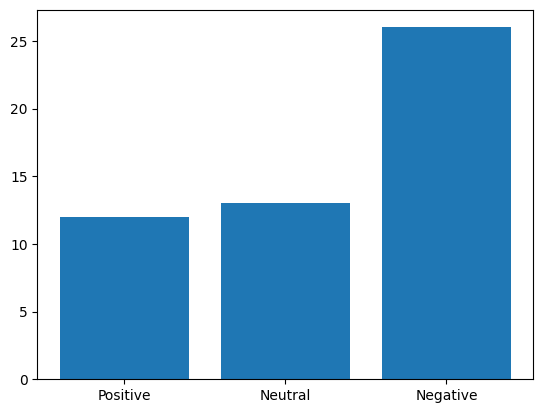

In [30]:
plt.bar(['Positive','Neutral','Negative'],[pos,neut,neg])